### Data Analysis Project: Bike Sharing Dataset
- Name: Bugi Sulistiyo
- Email: bugisulistiyo@gmail.com
- Id Dicoding: bugi_sulistiyo
### Defining Business Question
- When is the highest bike rest happened?
- How the bike rent trend from years?
### Prepare All The Needed Library

In [124]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

In [125]:
# global variables
PATH_DATA = r'./dataset/'
PATH_BIKESHARE_DAY = os.path.join(PATH_DATA, 'day.csv')
PATH_BIKESHARE_HOUR = os.path.join(PATH_DATA, 'hour.csv')

### Data Wrangling
#### Gathering Data

In [126]:
# Getting bikeshare per day data
bikeshare_day_df = pd.read_csv(PATH_BIKESHARE_DAY)
bikeshare_day_df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


In [127]:
# Getting bikeshare per hour data
bikeshare_hour_df = pd.read_csv(PATH_BIKESHARE_HOUR)
bikeshare_hour_df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


#### Assessing Data

In [128]:
bikeshare_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Result of assement:
- there's no missing value
- there's no null value

In [129]:
bikeshare_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Result of assement:
- there's no missing value
- there's no null value

In [130]:
bikeshare_day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Result of Assesment:
- There's no invalid value
- The data has good distribution

In [131]:
bikeshare_hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Result of Assesment:
- There's no invalid value
- The data has good distribution

In [132]:
bikeshare_day_df.duplicated().sum()

0

In [133]:
bikeshare_hour_df.duplicated().sum()

0

Result of Assesment:
- There's no duplicate value for bike share per day
- There's no duplicate value for bike share per hour

##### Summary Assesment Result
| Dataset | Data Type | Missing Values | Null Values | Inaccurate Value |
|---------|-----------|----------------|-------------|------------------|
| Day     | None      | None           | None        | None             |
| Hour    | None      | None           | None        | None             |

#### Cleaning Data

In [217]:
bikeshare_day_df.dteday = pd.to_datetime(bikeshare_day_df.dteday)
bikeshare_hour_df.dteday = pd.to_datetime(bikeshare_hour_df.dteday)

### Exploratory Data Analysis (EDA)
#### Exploring The Data

In [134]:
bikeshare_day_df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [135]:
bikeshare_day_df.dteday.nunique() == bikeshare_day_df.shape[0]

True

#### Exploring season columns

In [136]:
# change the season values to their corresponding names
seasons = {1: 'spring',
           2: 'summer',
           3: 'fall',
           4: 'winter'}
bikeshare_day_df['season'] = bikeshare_day_df['season'].map(seasons)
bikeshare_day_df.season.value_counts()

season
fall      188
summer    184
spring    181
winter    178
Name: count, dtype: int64

#### Exploring month columns

In [137]:
# change the month values to their corresponding names
months = {1: 'January', 2: 'February',
          3: 'March', 4: 'April',
          5: 'May', 6: 'June',
          7: 'July', 8: 'August',
          9: 'September', 10: 'October',
          11: 'November', 12: 'December'}
bikeshare_day_df['mnth'] = bikeshare_day_df['mnth'].map(months)
bikeshare_day_df.mnth.value_counts()

mnth
January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     57
Name: count, dtype: int64

#### Exploring workingday columns

In [138]:
# change the workingday values to true or false
workingday = {0: 'Weekend',
              1: 'Working Day'}
bikeshare_day_df['workingday'] = bikeshare_day_df['workingday'].map(workingday)
bikeshare_day_df.workingday.value_counts()

workingday
Working Day    500
Weekend        231
Name: count, dtype: int64

#### Exploring the year columns

In [139]:
# change the year values to their corresponding names
year = {0: 2011,
        1: 2012}
bikeshare_day_df['yr'] = bikeshare_day_df['yr'].map(year)
bikeshare_day_df.yr.value_counts()

yr
2012    366
2011    365
Name: count, dtype: int64

#### Exploring the weather columns

In [140]:
# change the weather values to their corresponding names
weather = {1: 'Clear',
           2: 'Mist',
           3: 'Light Snow',
           4: 'Heavy Rain'}
bikeshare_day_df['weathersit'] = bikeshare_day_df['weathersit'].map(weather)
bikeshare_day_df.weathersit.value_counts()

weathersit
Clear         463
Mist          247
Light Snow     21
Name: count, dtype: int64

#### Exploring the day columns

In [141]:
# change the day values to their corresponding names
day = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
       4: 'Thursday', 5:'Friday', 6: 'Saturday'}
bikeshare_day_df['weekday'] = bikeshare_day_df['weekday'].map(day)
bikeshare_day_df.weekday.value_counts()

weekday
Saturday     105
Sunday       105
Monday       105
Tuesday      104
Wednesday    104
Thursday     104
Friday       104
Name: count, dtype: int64

### Visualization & Explanatory Analysis
#### Question 1: When is the highest bike rent happened?

In [142]:
bikeshare_day_season = bikeshare_day_df[["season",
                                         "cnt"]].groupby('season').sum().reset_index()
bikeshare_day_season.sort_values(by='cnt',
                                 ascending=False,
                                 inplace=True)
bikeshare_day_season.rename(columns={'cnt':"count"}).head()

,season,count
0,fall,1061129
2,summer,918589
3,winter,841613
1,spring,471348


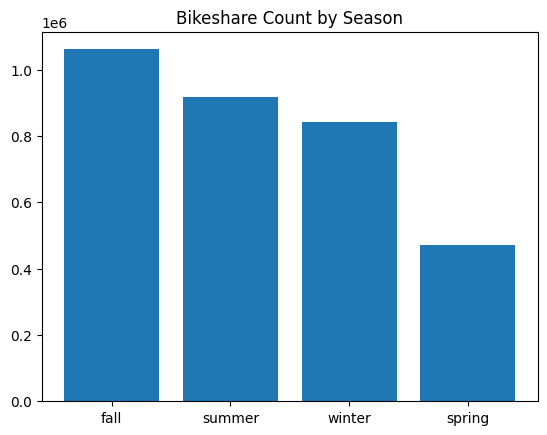

In [143]:
plt.bar(bikeshare_day_season.season,
        bikeshare_day_season.cnt)
plt.title("Bikeshare Count by Season")
plt.show()

In [144]:
bikeshare_month = bikeshare_day_df[["mnth",
                                    "cnt"]].groupby('mnth').sum().reset_index()
bikeshare_month.rename(columns={"cnt":"count",
                                "mnth":"month"}).head()

,month,count
0,April,269094
1,August,351194
2,December,211036
3,February,151352
4,January,134933


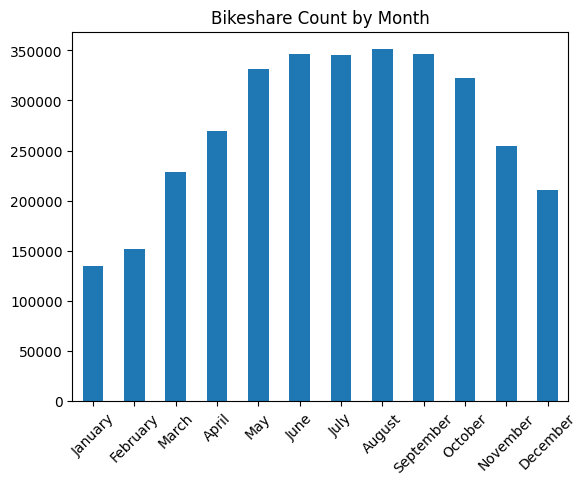

In [161]:
bikeshare_month.sort_values(by='mnth',
                            inplace=True,
                            key=lambda x: pd.to_datetime(x,
                                                         format='%B'))
bikeshare_month.plot(x='mnth', y='cnt',
                     kind='bar', legend=False,
                     xlabel="")
plt.title("Bikeshare Count by Month")
plt.xticks(rotation=45)
plt.show()


In [146]:
bikeshare_day_workingday = bikeshare_day_df[["workingday",
                                                "cnt"]].groupby('workingday').sum().reset_index()

bikeshare_day_workingday.loc[bikeshare_day_workingday.workingday == 'Weekend',
                             'cnt'] = bikeshare_day_workingday.loc[bikeshare_day_workingday.workingday == 'Weekend',
                                                                   'cnt'] / 2
bikeshare_day_workingday.loc[bikeshare_day_workingday.workingday == 'Working Day',
                             'cnt'] = bikeshare_day_workingday.loc[bikeshare_day_workingday.workingday == 'Working Day',
                                                                   'cnt'] / 5

bikeshare_day_workingday.rename(columns={"workingday":"Working Day",
                                         "cnt":"count"}).head()

C:\Users\Bugi\AppData\Local\Temp\ipykernel_10884\3772192445.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[500134.5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  bikeshare_day_workingday.loc[bikeshare_day_workingday.workingday == 'Weekend',


,Working Day,count
0,Weekend,500134.5
1,Working Day,458482.0


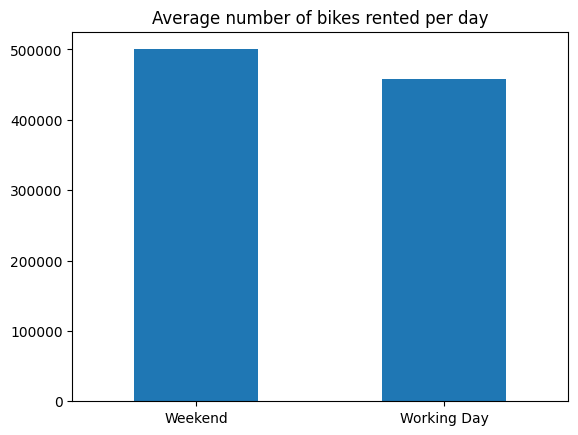

In [164]:
bikeshare_day_workingday.plot(x='workingday', y='cnt',
                              kind='bar', legend=False,
                              xlabel="")
plt.title('Average number of bikes rented per day')
plt.xticks(rotation=0)
plt.show()

In [167]:
bikeshare_day_year = bikeshare_day_df[["yr",
                                       "cnt"]].groupby('yr').sum().reset_index()
bikeshare_day_year.sort_values(by='cnt',
                               ascending=False,
                               inplace=True)
bikeshare_day_year.rename(columns={"yr":"year",
                                   "cnt":"count"}).head()

,year,count
1,2012,2049576
0,2011,1243103


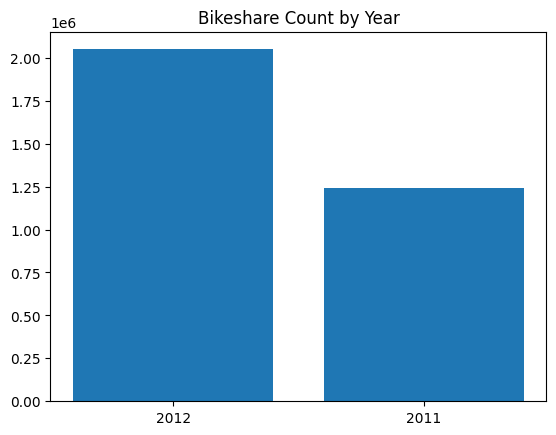

In [169]:
plt.bar(bikeshare_day_year.yr.astype(str),
        bikeshare_day_year.cnt)
plt.title("Bikeshare Count by Year")
plt.show()

In [215]:
bikeshare_day_day = bikeshare_day_df[["weekday",
                                      "cnt"]].groupby('weekday').sum().reset_index()
bikeshare_day_day.sort_values(by='cnt',
                                ascending=False,
                                inplace=True)
bikeshare_day_day.rename(columns={"cnt":"count",
                                  "weekday":"day"}).head(7)

,day,count
0,Friday,487790
4,Thursday,485395
2,Saturday,477807
6,Wednesday,473048
5,Tuesday,469109
1,Monday,455503
3,Sunday,444027


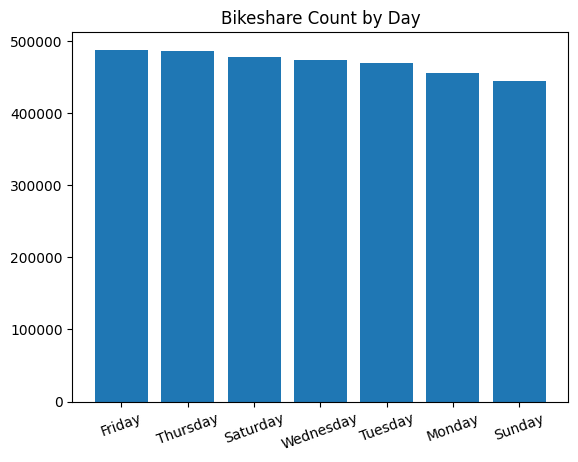

In [216]:
plt.bar(bikeshare_day_day['weekday'], bikeshare_day_day['cnt'])
plt.title("Bikeshare Count by Day")
plt.xticks(rotation=20)
plt.show()

#### Question 2: How the bike rent trend from years?

In [218]:
bikeshare_per_day_chart = pd.DataFrame(bikeshare_day_df[['dteday',
                                                         'cnt']])
bikeshare_per_day_chart.reset_index(level=0,
                                    inplace=True)
bikeshare_per_day_chart.head(10)

,index,dteday,cnt
0,0,2011-01-01,985
1,1,2011-01-02,801
2,2,2011-01-03,1349
3,3,2011-01-04,1562
4,4,2011-01-05,1600
5,5,2011-01-06,1606
6,6,2011-01-07,1510
7,7,2011-01-08,959
8,8,2011-01-09,822
9,9,2011-01-10,1321


In [219]:
bikeshare_per_day_chart['year'] = bikeshare_per_day_chart['dteday'].dt.year
bikeshare_per_day_chart['month'] = bikeshare_per_day_chart['dteday'].dt.month
bikeshare_per_day_chart['date'] = (bikeshare_per_day_chart['year'].astype(str)
                                   + '-'
                                   + bikeshare_per_day_chart['month'].astype(str))
bikeshare_per_day_chart.head()

,index,dteday,cnt,year,month,date
0,0,2011-01-01,985,2011,1,2011-1
1,1,2011-01-02,801,2011,1,2011-1
2,2,2011-01-03,1349,2011,1,2011-1
3,3,2011-01-04,1562,2011,1,2011-1
4,4,2011-01-05,1600,2011,1,2011-1


In [155]:
bikeshare_per_day_chart.date.unique()

array(['2011-1', '2011-2', '2011-3', '2011-4', '2011-5', '2011-6',
       '2011-7', '2011-8', '2011-9', '2011-10', '2011-11', '2011-12',
       '2012-1', '2012-2', '2012-3', '2012-4', '2012-5', '2012-6',
       '2012-7', '2012-8', '2012-9', '2012-10', '2012-11', '2012-12'],
      dtype=object)

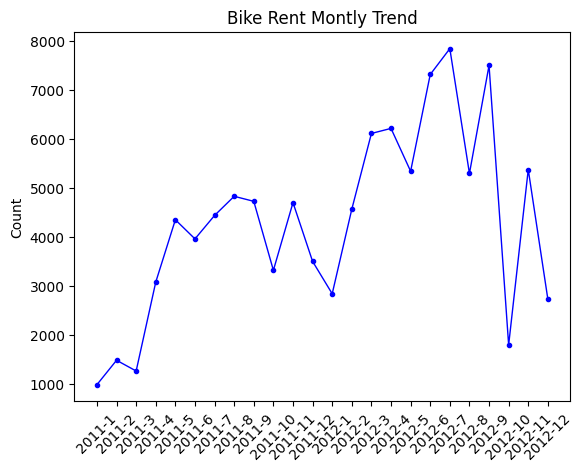

In [222]:
bspline = sp.interpolate.make_interp_spline(bikeshare_per_day_chart.index,
                                            bikeshare_per_day_chart.cnt)

x_new = np.linspace(bikeshare_per_day_chart.index.min(),
                    bikeshare_per_day_chart.index.max(),
                    24)
y_new = bspline(x_new)
plt.plot(bikeshare_per_day_chart.date.unique(), y_new,
         color='blue',
         linewidth=1, marker='.')

plt.title("Bike Rent Montly Trend")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.show()

## Conclusion

The analysis of the bike sharing dataset reveals the following insights:

1. Conclution question 1
   - **Seasonal Usage:** The bar chart showing the bike rentals by season indicates that the highest number of rentals occur during the fall season, followed by summer, spring, and winter.
   - **Monthly Usage:** The bar chart displaying the bike rentals by month demonstrates that the peak usage occurs in the months of June, July, and August, which are the summer months. The lowest usage is observed in January and February.
   - **Weekday Usage:** The bar chart representing the bike rentals by weekday indicates that the highest number of rentals occur on weekdays, with Monday having the highest usage. The usage decreases on weekends, with Sunday having the lowest rental count.
   - **Yearly Usage:** The bar chart showing the bike rentals by year reveals that there is a significant increase in rentals from 2011 to 2012, with 2012 having almost double the number of rentals compared to 2011.
   - **Weather Conditions:** The bar chart displaying the bike rentals by weather condition shows that the majority of rentals occur during clear weather, followed by misty conditions. Light snow and heavy rain have the lowest rental counts.

2. Conclution question 2
   - **Daily Usage:** The line chart depicting the daily bike rentals demonstrates a fluctuating pattern throughout the year. There are peaks and valleys in the rental count, indicating variations in demand.

**Overall**, the analysis of the bike sharing dataset provides valuable insights into the usage patterns and trends, which can be used for further analysis and decision-making.

In [157]:
bikeshare_day_df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,January,0,Saturday,Weekend,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,January,0,Sunday,Weekend,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801


In [158]:
bikeshare_day_df.to_csv('./dataset/bikeshare_day.csv', index=False)